<a href="https://colab.research.google.com/github/RuslanMavlitov/sf_data_science/blob/main/%22practice_NN_keras_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первая нейросеть на Keras


## Сегодня на практическом занятии:

1. Обучим нейросеть на Keras для задачи регрессии (california housing)
2. Подготовим изображения к обучению нейросети
3. Обучим нейросеть на Keras для задачи классификации (MNIST)
4. Обучим нейросеть на Keras для задачи восстановления изображений

## Нейросеть для California housing

Будем работать с набором данным `fetch_california_housing` из `sklearn`.

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [4]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)

#### 1.1. Разбейте данные на обучение и тест

In [5]:
# Ваш код здесь
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)


#### 1.2. Создайте архитектуру для этой задачи

In [19]:
# Ваш код здесь
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
tf.random.set_seed(9)

model = Sequential([
    Dense(16, input_shape=(8,), activation='relu'),
    Dense(1, activation='relu')
])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                144       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [20]:
# Ваш код здесь
model.compile(optimizer='sgd', loss='mse', metrics='mae')


#### 1.4. Обучите нейросеть

Выберите нужное количество эпох.


In [22]:
# Ваш код здесь
%%time
model.fit(X_norm, y, epochs=20)


Epoch 1/20
645/645 [==============================] - 2s 3ms/step - loss: 0.4598 - mae: 0.4836
Epoch 2/20
645/645 [==============================] - 2s 3ms/step - loss: 0.4596 - mae: 0.4837
Epoch 3/20
645/645 [==============================] - 1s 2ms/step - loss: 0.4587 - mae: 0.4830
Epoch 4/20
645/645 [==============================] - 1s 2ms/step - loss: 0.4584 - mae: 0.4827
Epoch 5/20
645/645 [==============================] - 2s 3ms/step - loss: 0.4572 - mae: 0.4825
Epoch 6/20
645/645 [==============================] - 1s 2ms/step - loss: 0.4576 - mae: 0.4819
Epoch 7/20
645/645 [==============================] - 1s 1ms/step - loss: 0.4570 - mae: 0.4811
Epoch 8/20
645/645 [==============================] - 1s 1ms/step - loss: 0.4553 - mae: 0.4811
Epoch 9/20
645/645 [==============================] - 1s 1ms/step - loss: 0.4557 - mae: 0.4799
Epoch 10/20
645/645 [==============================] - 1s 1ms/step - loss: 0.4560 - mae: 0.4805
Epoch 11/20
645/645 [============================

#### 1.5. Сделайте вывод, хорошо ли модель обучается?

Если модель обучается плохо, можете внести изменения в работу.

In [ ]:
# Ваш вывод здесь



#### 1.6. Сделайте предсказания на тестовых данных

In [23]:
# Ваш код здесь
preds = model.predict(X_test)


#### 1.7. Посчитайте метрику качества на тестовых данных

Доп информация по метрикам [здесь](https://youtu.be/vh2smjQyhp8)

In [24]:
# Ваш код здесь
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test)


0.46578594818551716

MAE довольно низкий. Модель обучилась хорошо

## 2. Нейросеть для MNIST

Будем работать с набором данных `MNIST` из `keras`.

In [25]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, X_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

### 2.1. Отрисуйте несколько примеров из обучения

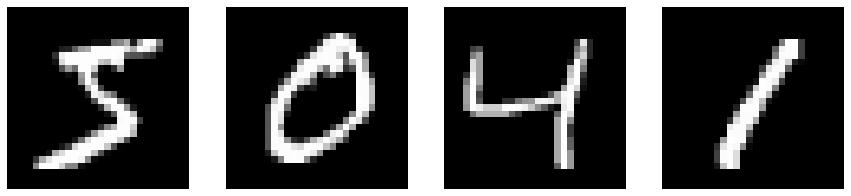

In [33]:
# Ваш код здесь
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(15, 10))

for i in range(4):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')


### 2.2. Подготовка данных

#### 2.2.1. Возьмите для обучения только два класса (3 и 8), чтобы сделать задачу бинарной классификации.

In [40]:
import numpy as np

In [41]:
# Ваш код здесь
idxs = np.where((y_train == 3) | (y_train == 8))
y_train = y_train[idxs]


In [42]:
X_train = X_train[idxs]

In [43]:
X_train.shape, y_train.shape

((11982, 28, 28), (11982,))

#### 2.2.2. И тоже самое сделайте для теста

In [44]:
# Ваш код здесь
idxs = np.where((y_test == 3) | (y_test == 8))
y_test = y_test[idxs]

X_test = X_test[idxs]

X_test.shape, y_test.shape


((1984, 28, 28), (1984,))

#### 2.2.3. Отрисуйте несколько изображений из новых данных


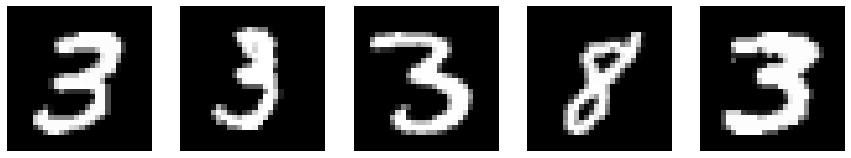

In [45]:
# Ваш код здесь
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')


In [46]:
y_train[:5]

array([3, 3, 3, 8, 3], dtype=uint8)

#### 2.2.4. Нормируйте данные

In [47]:
# Ваш код здесь
print(X_train.min(), X_train.max())

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.min(), X_train.max())


0 255
0.0 1.0


#### 2.2.5. Преобразуйте целевые значения в бинарный вид

При этом еще нужно вначале перевести класс 3 и 8 в 0 и 1, только при таких метках класса сетка будет обучаться правильно.

In [50]:
y_train[y_train == 3] = 0
y_train[y_train == 8] = 1

y_test[y_test == 3] = 0
y_test[y_test == 8] = 1

In [51]:
# Ваш код здесь
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [52]:
# Ваш код здесь
y_train_cat[:5]


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

### 2.3. Создайте архитектуру для этой задачи

In [53]:
# Ваш код здесь
from keras.layers import Flatten
from keras.models import Sequential


model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='sigmoid')
])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 128)               65664     
                                                                 
 dense_12 (Dense)            (None, 2)                 258       
                                                                 
Total params: 467,842
Trainable params: 467,842
Non-trainable params: 0
_________________________________________________________________


### 2.4. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [54]:
# Ваш код здесь
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')


### 2.5. Обучите нейросеть

Выберите нужное количество эпох.


In [55]:
# Ваш код здесь
%%time
model.fit(X_train, y_train_cat, epochs=20)


Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 0.3077 - accuracy: 0.9102
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1418 - accuracy: 0.9543
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1151 - accuracy: 0.9637
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1032 - accuracy: 0.9667
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0953 - accuracy: 0.9710
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0896 - accuracy: 0.9719
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0843 - accuracy: 0.9739
Epoch 8/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0797 - accuracy: 0.9759
Epoch 9/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0756 - accuracy: 0.9770
Epoch 10/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0716 - accuracy: 0.9786

### 2.6. Сделайте предсказания на тестовых данных

In [57]:
# Ваш код здесь
print("Предсказание нейронной сети: ")
pred = model.predict(X_test)
pred


Предсказание нейронной сети: 


array([[9.6037239e-01, 4.4633448e-02],
       [9.9994695e-01, 5.9514594e-05],
       [9.9966860e-01, 3.2436848e-04],
       ...,
       [8.4304261e-01, 1.7744836e-01],
       [1.6551018e-03, 9.9853033e-01],
       [9.9999785e-01, 2.4616152e-06]], dtype=float32)

### 2.7. Посчитайте метрику качества на тестовых данных

По метрикам можете повторить эти занятия по [ссылке](https://youtube.com/playlist?list=PLkJJmZ1EJno6CLyvD4DHc32Fed6cPBHje)

In [58]:
# Ваш код здесь
preds_cls = pred.argmax(axis=1)
preds_cls


array([0, 0, 0, ..., 0, 1, 0])

In [59]:
from sklearn.metrics import accuracy_score

print(f'test acc: {accuracy_score(y_test, preds_cls)*100:.2f}% ({(y_test == preds_cls).sum()} out of {y_test.shape[0]})')

test acc: 98.34% (1951 out of 1984)


Шикарный результат. Модель хорошо умеет различать 3 и 8

## 3. Нейросеть для восстановления изображения

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

In [60]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [61]:
train.shape

(320, 4096)

Сейчас изображение - это вектор 4096.

### 3.1. Работа с данными

#### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [62]:
# Ваш код здесь
train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

print(train.shape)
print(test.shape)


(320, 64, 64)
(80, 64, 64)


#### 3.1.2. Отрисуйте несколько примеров

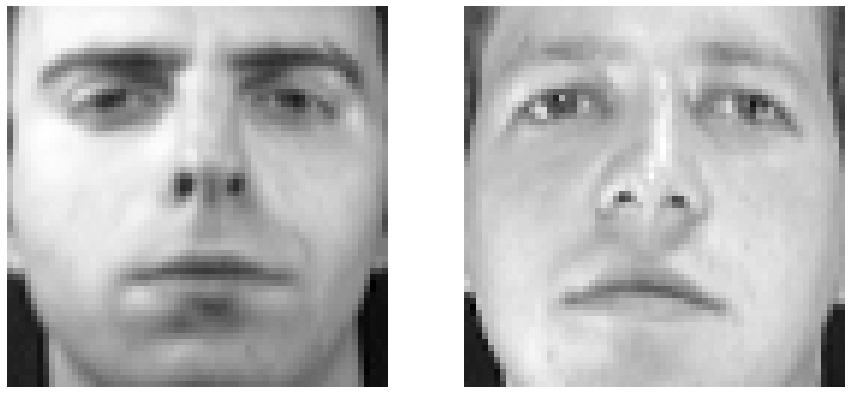

In [64]:
# Ваш код здесь
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

for i in range(2):
    ax[i].imshow(test[i], cmap='gray')
    ax[i].axis('off')


Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [65]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [66]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

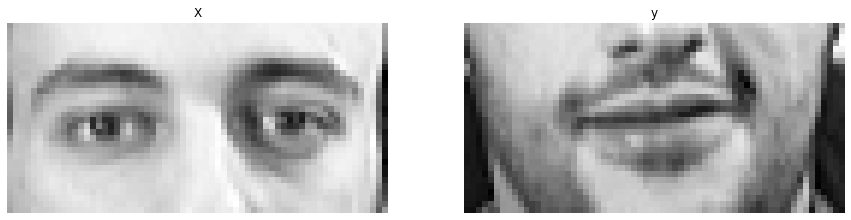

In [67]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048. 

In [68]:
# Ваш код здесь
y_train_n = y_train.reshape(y_train.shape[0], 2048)
y_test_n = y_test.reshape(y_test.shape[0], 2048)


### 3.2. Создайте архитектуру для этой задачи

In [81]:
# Ваш код здесь
from keras.layers import Dense, Flatten
from keras.models import Sequential


model = Sequential([
    Flatten(input_shape=(32, 64)),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(2048, activation='linear')
])

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_17 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_18 (Dense)            (None, 2048)              4196352   
                                                                 
Total params: 12,589,056
Trainable params: 12,589,056
Non-trainable params: 0
_________________________________________________________________


### 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [82]:
# Ваш код здесь
model.compile(optimizer='adam', loss='mse', metrics='mae')


### 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [83]:
# Ваш код здесь
model.fit(X_train, y_train_n, epochs=400)

Epoch 1/400
10/10 [==============================] - 2s 167ms/step - loss: 0.1120 - mae: 0.2395
Epoch 2/400
10/10 [==============================] - 1s 124ms/step - loss: 0.0215 - mae: 0.1158
Epoch 3/400
10/10 [==============================] - 1s 109ms/step - loss: 0.0192 - mae: 0.1099
Epoch 4/400
10/10 [==============================] - 1s 110ms/step - loss: 0.0185 - mae: 0.1071
Epoch 5/400
10/10 [==============================] - 1s 109ms/step - loss: 0.0167 - mae: 0.1017
Epoch 6/400
10/10 [==============================] - 1s 109ms/step - loss: 0.0164 - mae: 0.1002
Epoch 7/400
10/10 [==============================] - 1s 108ms/step - loss: 0.0159 - mae: 0.0983
Epoch 8/400
10/10 [==============================] - 1s 113ms/step - loss: 0.0152 - mae: 0.0959
Epoch 9/400
10/10 [==============================] - 1s 111ms/step - loss: 0.0147 - mae: 0.0939
Epoch 10/400
10/10 [==============================] - 1s 109ms/step - loss: 0.0145 - mae: 0.0930
Epoch 11/400
10/10 [===================

### 3.5. Сделайте предсказания на тестовых данных

In [84]:
# Ваш код здесь
preds = model.predict(X_test)


### 3.6. Посчитайте метрику качества на тестовых данных

Доп информация по метрикам [здесь](https://youtu.be/vh2smjQyhp8)

In [85]:
# Ваш код здесь
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE {}'.format(mean_absolute_error(preds, y_test_n)))
print('MSE {}'.format(mean_squared_error(preds, y_test_n)))


MAE 0.07237707078456879
MSE 0.009937331080436707


### 3.7. Поменяйте размерность предсказанных векторов в двумерное изображение

In [86]:
# Ваш код здесь
preds_n = preds.reshape(preds.shape[0], 32, 64)


А сейчас отрисуем все предсказания.

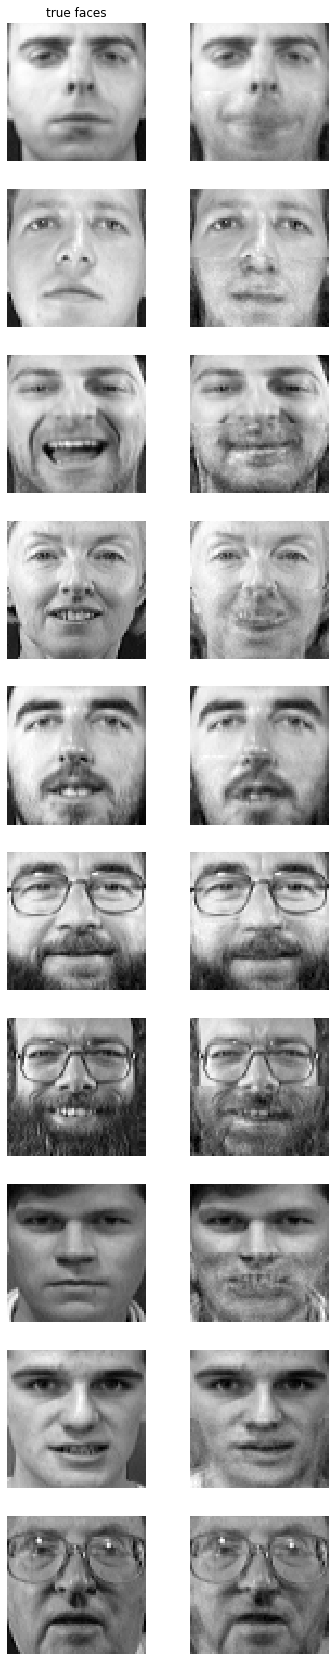

In [89]:
n_faces = 10
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(10):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], preds_n[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )

## Резюме 

Сегодня на практическом занятии:

1. Обучили нейросеть на Keras для задачи регрессии (california housing)
2. Подготовили изображения к обучению нейросети
3. Обучили нейросеть на Keras для задачи классификации (MNIST)
4. Обучили нейросеть на Keras для задачи восстановления изображений

**Муррр** ♥